In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[8,4]

In [ ]:
df=pd.read_csv('/content/housing_price_dataset.csv (1).zip')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
df.shape

(50000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


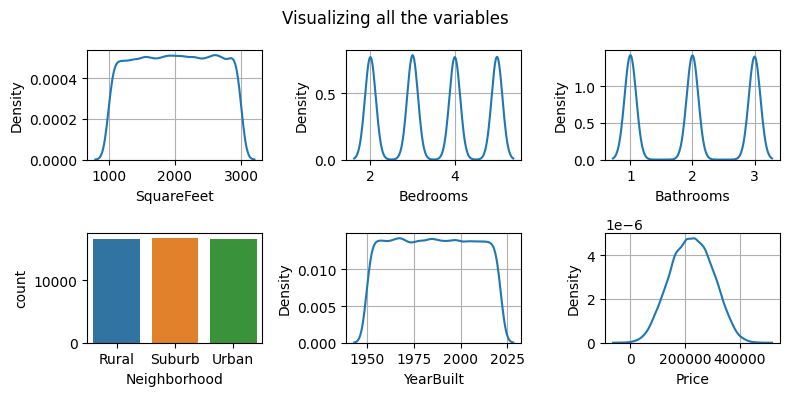

In [ ]:
r=2
c=3
it=1
for i in df.columns:
    plt.suptitle("Visualizing all the variables")
    plt.subplot(r,c,it)
    if df[i].dtypes=='object':
        sns.countplot(x=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

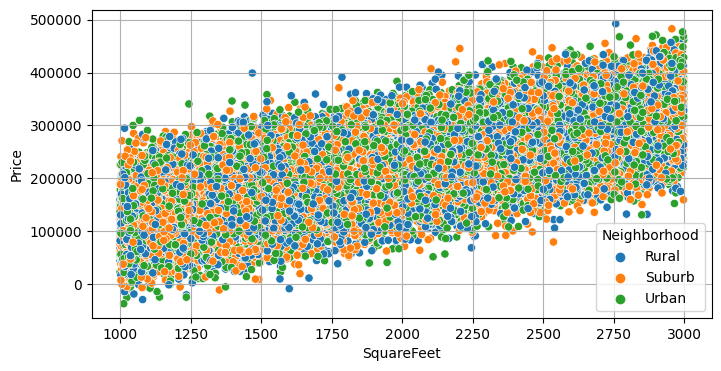

In [ ]:
sns.scatterplot(x='SquareFeet',y='Price',data=df,hue='Neighborhood')
plt.grid()
plt.show()

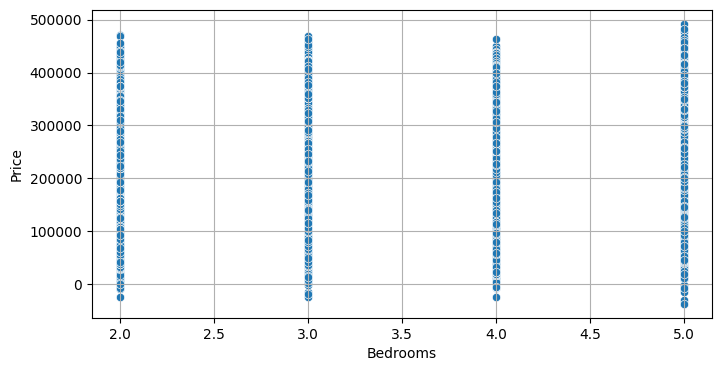

In [ ]:
sns.scatterplot(x='Bedrooms',y='Price',data=df)
plt.grid()
plt.show()

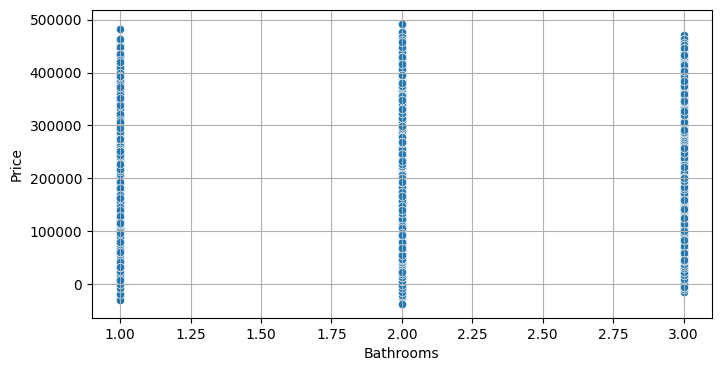

In [ ]:
sns.scatterplot(x='Bathrooms',y='Price',data=df)
plt.grid()
plt.show()

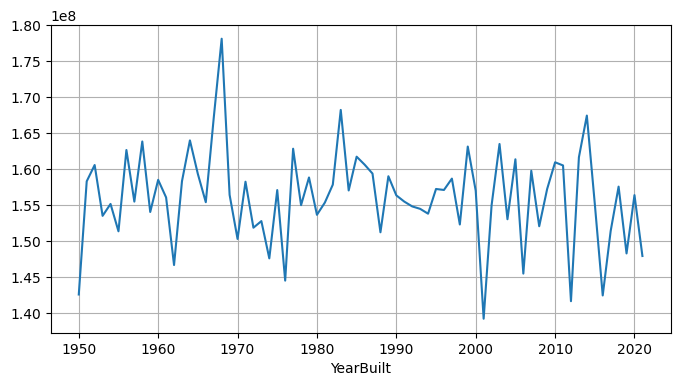

In [ ]:
df.groupby('YearBuilt')['Price'].sum().plot(kind='line')
plt.grid()
plt.show()

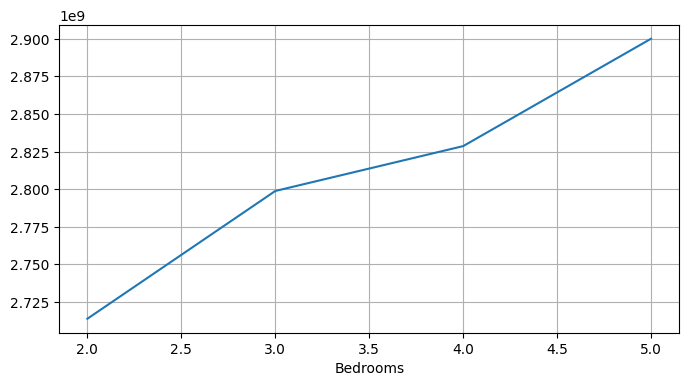

In [ ]:
df.groupby('Bedrooms')['Price'].sum().plot(kind='line')
plt.grid()
plt.show()

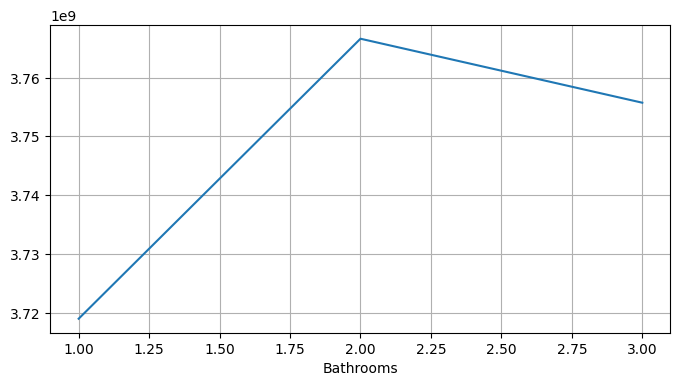

In [ ]:
df.groupby('Bathrooms')['Price'].sum().plot(kind='line')
plt.grid()
plt.show()

In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [ ]:
df=pd.get_dummies(df,columns=['Neighborhood'],drop_first=True,dtype=int)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,0,0
1,2459,3,2,1980,195014.221626,0,0
2,1860,2,1,1970,306891.012076,1,0
3,2294,2,1,1996,206786.787153,0,1
4,2130,5,2,2001,272436.239065,1,0


In [ ]:
df=df.drop('YearBuilt',axis=1)
df.head()

,SquareFeet,Bedrooms,Bathrooms,Price,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,215355.283618,0,0
1,2459,3,2,195014.221626,0,0
2,1860,2,1,306891.012076,1,0
3,2294,2,1,206786.787153,0,1
4,2130,5,2,272436.239065,1,0


In [ ]:
y = df['Price']
x = df.drop('Price',axis=1)

In [ ]:
x.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood_Suburb',
       'Neighborhood_Urban'],
      dtype='object')

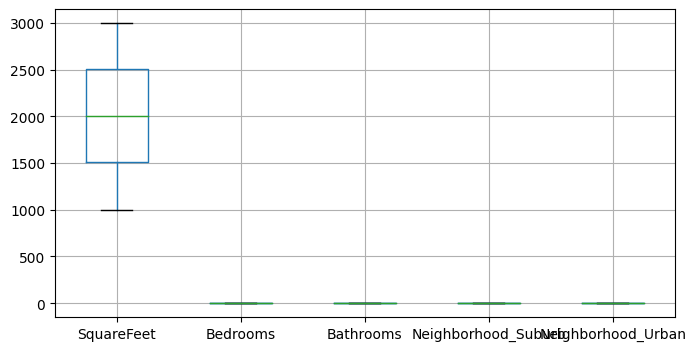

In [ ]:
x.boxplot()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
ss = StandardScaler()
mmax = MinMaxScaler()

In [ ]:
x[['SquareFeet', 'Bedrooms', 'Bathrooms']] = ss.fit_transform(x[['SquareFeet', 'Bedrooms', 'Bathrooms']])
x.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood_Suburb,Neighborhood_Urban
0,0.207861,0.449067,-1.220113,0,0
1,0.786480,-0.446738,0.005614,0,0
2,-0.254340,-1.342543,-1.220113,1,0
3,0.499777,-1.342543,-1.220113,0,1
4,0.214811,1.344872,0.005614,1,0


In [ ]:
import statsmodels.api as sm

In [ ]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.327e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:38:41   Log-Likelihood:            -6.1185e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49994   BIC:                         1.224e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.245e+05    

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()

In [ ]:
def predictor(model_name):
    print("For the {}".format(model_name))
    model_name.fit(xtrain,ytrain)
    y_pred_train = model_name.predict(xtrain)
    y_pred_test = model_name.predict(xtest)
    print("The TRAIN r2 score is",r2_score(ytrain,y_pred_train))
    print("The RMSE score for TRAIN data is",np.sqrt(mean_squared_error(ytrain,y_pred_train)))
    sns.kdeplot(ytrain)
    sns.kdeplot(y_pred_train)
    plt.grid()
    plt.show()
    print("--"*50)
    print("The TEST r2 score is",r2_score(ytest,y_pred_test))
    print("The RMSE score for TEST data is",np.sqrt(mean_squared_error(ytest,y_pred_test)))
    sns.kdeplot(ytest)
    sns.kdeplot(y_pred_test)
    plt.grid()
    plt.show()

For the LinearRegression()
The TRAIN r2 score is 0.569012932929813
The RMSE score for TRAIN data is 50019.39932727445


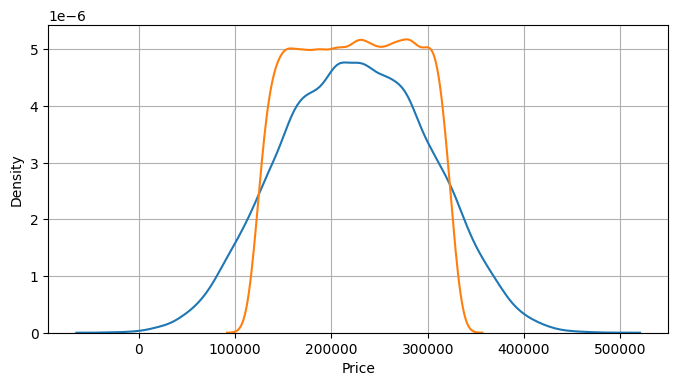

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.5729734893713994
The RMSE score for TEST data is 49679.17809551116


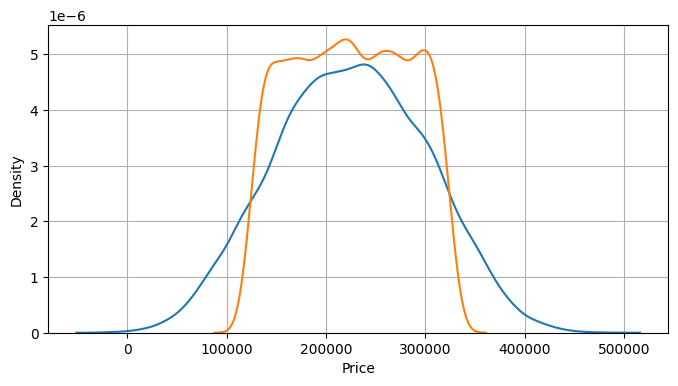

In [ ]:
predictor(lr)

For the DecisionTreeRegressor()
The TRAIN r2 score is 0.9117743181584114
The RMSE score for TRAIN data is 22631.00625714102


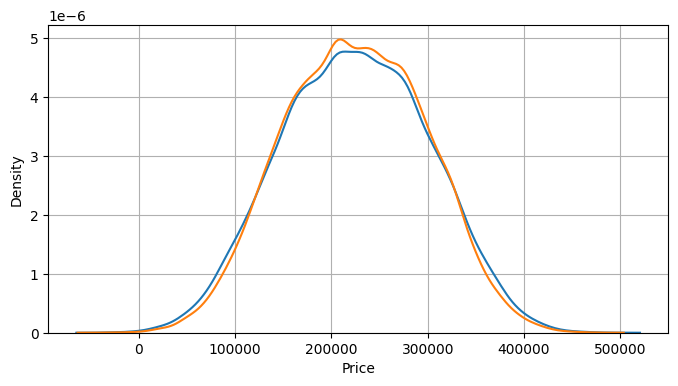

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.15254989873785352
The RMSE score for TEST data is 69984.85244241521


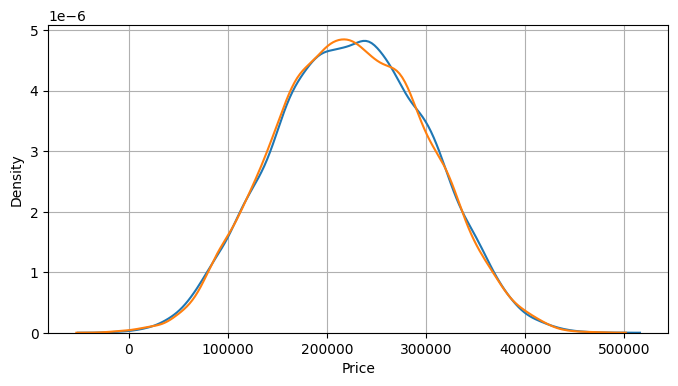

In [ ]:
predictor(dt)

For the RandomForestRegressor()
The TRAIN r2 score is 0.8646404845937431
The RMSE score for TRAIN data is 28031.78467167119


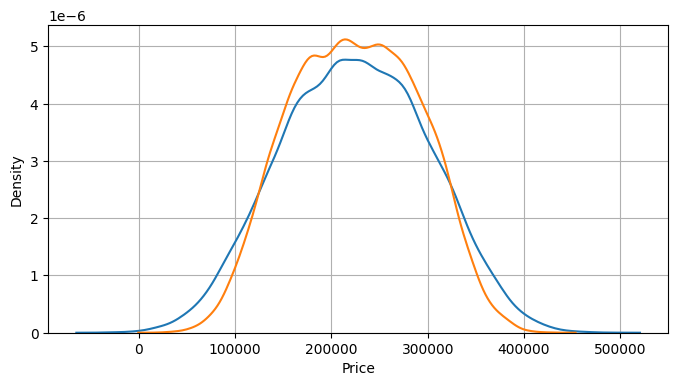

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.44742093179742437
The RMSE score for TEST data is 56512.4581166759


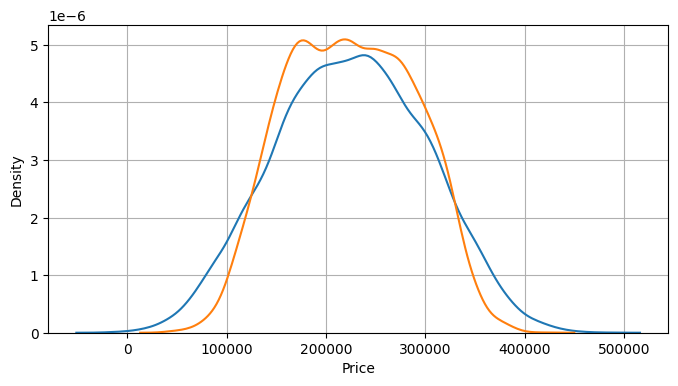

In [ ]:
predictor(rf)

For the KNeighborsRegressor()
The TRAIN r2 score is 0.6583331359369102
The RMSE score for TRAIN data is 44535.64882354002


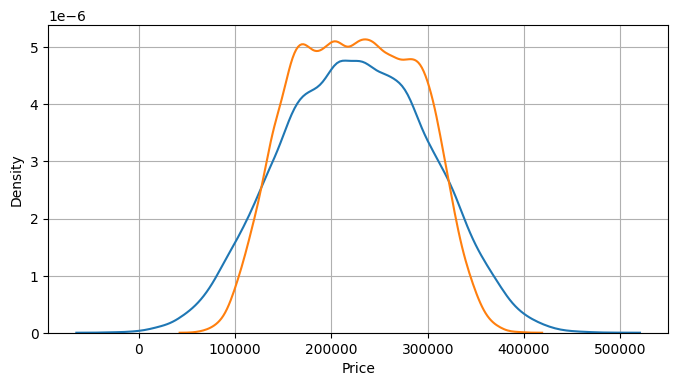

----------------------------------------------------------------------------------------------------
The TEST r2 score is 0.48813019521352463
The RMSE score for TEST data is 54390.96184829477


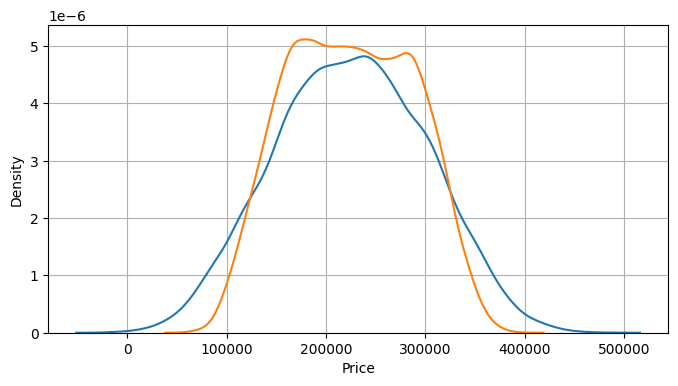

In [ ]:
predictor(knn)

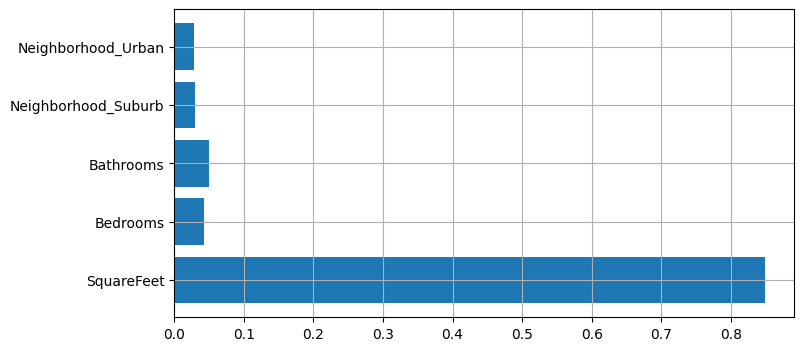

In [ ]:
# Feature importances
plt.barh(xtrain.columns,rf.fit(xtrain,ytrain).feature_importances_)
plt.grid()
plt.show()